# Implementación de firma digital con Curva Elíptica y protocolo Diffie-Hellman

$y^2 \equiv x^3 + 2x + 2  (mod 17)$
## Para doblar punto:
$\lambda = \frac{3x_{G}^2 + a}{2y_{G}}$
$\newline$
$x_{2G} = \lambda - 2x_{G} $
$\newline$
$y_{2G} = \lambda(x_{G}-x_{2G}) - y_{G}$
## Para sumar puntos:
$\lambda = \frac{y_{2}-y{1}}{x_{2}-x_{1}}$
$\newline$
$x_{3} = \lambda^{2}-x_{1}-x_{2}$
$\newline$
$y_{3} = \lambda(x_{1} - x_{3}) - y_{1}$

In [242]:
using OrderedCollections

In [243]:
#=
Código para generar el grupo cíclico de los enteros módulo un primo
=#
dict_x = Dict()
dict_y = Dict()
lis = []
puntos = ()

for i in 0:16
   
    #print(i)
    dict_y[i] = (i^2) % 17#𝑦²
    dict_x[i] = ((i^3) + (2*i) + 2) % 17#𝑥³+2𝑥+2
   
end


In [244]:
dict_x

Dict{Any, Any} with 17 entries:
  5  => 1
  16 => 16
  12 => 3
  8  => 3
  1  => 5
  0  => 2
  6  => 9
  11 => 12
  9  => 1
  14 => 3
  3  => 1
  7  => 2
  4  => 6
  13 => 15
  15 => 7
  2  => 14
  10 => 2

In [245]:
dict_y 

Dict{Any, Any} with 17 entries:
  5  => 8
  16 => 1
  12 => 8
  8  => 13
  1  => 1
  0  => 0
  6  => 2
  11 => 2
  9  => 13
  14 => 9
  3  => 9
  7  => 15
  4  => 16
  13 => 16
  15 => 4
  2  => 4
  10 => 15

In [246]:
ord_x = sort(dict_x)#Acomodar el diccionario por orden numérico

OrderedDict{Any, Any} with 17 entries:
  0  => 2
  1  => 5
  2  => 14
  3  => 1
  4  => 6
  5  => 1
  6  => 9
  7  => 2
  8  => 3
  9  => 1
  10 => 2
  11 => 12
  12 => 3
  13 => 15
  14 => 3
  15 => 7
  16 => 16

In [247]:
ord_y = sort(dict_y)#Acomodar el diccionario por orden numérico

OrderedDict{Any, Any} with 17 entries:
  0  => 0
  1  => 1
  2  => 4
  3  => 9
  4  => 16
  5  => 8
  6  => 2
  7  => 15
  8  => 13
  9  => 13
  10 => 15
  11 => 2
  12 => 8
  13 => 16
  14 => 9
  15 => 4
  16 => 1

In [248]:
lis = [(i,j) for i in  keys(ord_x), j in keys(ord_y) if  ord_x[i] == ord_y[j]]

18-element Vector{Tuple{Int64, Int64}}:
 (3, 1)
 (5, 1)
 (9, 1)
 (6, 3)
 (16, 4)
 (0, 6)
 (7, 6)
 (10, 6)
 (13, 7)
 (13, 10)
 (0, 11)
 (7, 11)
 (10, 11)
 (16, 13)
 (6, 14)
 (3, 16)
 (5, 16)
 (9, 16)

In [249]:
function suma_puntos(p1,p2)
    
    
    #=
    Función para calcular la suma de 2 puntos
    𝜆=(𝑦2−𝑦1)/(𝑥2−𝑥1)
    𝑥3=𝜆²−𝑥1−𝑥2
    𝑦3=𝜆(𝑥1−𝑥3)−𝑦1
    =#

    suma = []
    
    x1 = p1[1]
    x2 = p2[1]
    y1 = p1[2]
    y2 = p2[2]
    
     m = (y2 - y1)/(x2 - x1)
    
    x3 = 0
    y3 = 0
    
    
    if (isa(m,Int64))
        
        x3 = mod((m^2 - x1 - x2) ,17)
        y3 =mod((m * (x1 - x3 ) - y1) , 17)
        
    else
    
        #=
        Como el grupo tiene domino en los enteros positivos se implenta esta condición para calcular el 
        inverso multiplicativo modular y evitar números fraccionarios 
        =#
        m =  mod((y2 - y1)*(invmod( x2 - x1 ,17) ) , 17)
        x3 = mod((m^2 - x1 - x2) , 17)
        y3 = mod((m * (x1 - x3 ) - y1) , 17)
    
    end
    
    suma = [(x3,y3)]
    
    return suma
end

function mult_2(punto)#OjO point es una tupla
   
    #print("$xG,$yG")
    
    #=
    Función para doblar 1 punto
    𝜆=(3𝑥²𝐺+𝑎)/2𝑦𝐺
    𝑥2𝐺=𝜆−2𝑥𝐺
    𝑦2𝐺=𝜆(𝑥𝐺−𝑥2𝐺)−𝑦𝐺
    
    =#
    
    xG = punto[1]
    yG = punto[2]
    

    gf = ()
    my_list = []
    
    

    
    
     m = (3 * xG ^ 2 + 2) / (2*yG)
    
    
    if(isa(m, Int64))
        
        x2G = mod((m^2 - 2*xG) ,17)
        y2G =mod((m * (xG - x2G ) - yG) , 17)
    else
        m = mod((3 * xG ^ 2 + 2)*(invmod(2 * yG,17) ),17)
        x2G =mod((m^2 - 2*xG) , 17)
        y2G =mod((m * (xG - x2G ) - yG) , 17)
    end
    
    #gf  = x2G ,y2G
    
    #append!(my_list,x2G ,y2G)
    
    my_list = [(x2G ,y2G)]
    
    return my_list
    
end

mult_2 (generic function with 1 method)

In [250]:
mult_2(lis[2])
#Duplicamos un punto tomado al azar el cual será el generador porque el orden del grupo de la curva es primo con el 
#punto infinito

1-element Vector{Tuple{Int64, Int64}}:
 (6, 3)

In [251]:
lis_gf = [lis[2],mult_2(lis[2])[1]]

2-element Vector{Tuple{Int64, Int64}}:
 (5, 1)
 (6, 3)

In [252]:
for i in 1:length(lis_gf)
    
        print(lis_gf[i])

end

(5, 1)(6, 3)

In [253]:
lis_gf

2-element Vector{Tuple{Int64, Int64}}:
 (5, 1)
 (6, 3)

In [254]:
suma_puntos(lis_gf[1],lis_gf[2])

1-element Vector{Tuple{Int64, Int64}}:
 (10, 6)

In [255]:
lis_gf[length(lis_gf)]

(6, 3)

In [256]:
lis_gf

2-element Vector{Tuple{Int64, Int64}}:
 (5, 1)
 (6, 3)

In [257]:
length(lis)-1

17

In [258]:
for i in 1:length(lis)-2
  append!(lis_gf, suma_puntos(lis_gf[1],lis_gf[length(lis_gf)]))
end
    
#=
Con este ciclo cálculamos iterativamente los puntos del grupo cíclico sumando siempre el primer elemento del grupo 
siendo éste el generador sumándolo con el último punto calculado
=#

#lis_gf

In [259]:
lis_gf

18-element Vector{Tuple{Int64, Int64}}:
 (5, 1)
 (6, 3)
 (10, 6)
 (3, 1)
 (9, 16)
 (16, 13)
 (0, 6)
 (13, 7)
 (7, 6)
 (7, 11)
 (13, 10)
 (0, 11)
 (16, 4)
 (9, 1)
 (3, 16)
 (10, 11)
 (6, 14)
 (5, 16)

In [260]:
lis_gf

18-element Vector{Tuple{Int64, Int64}}:
 (5, 1)
 (6, 3)
 (10, 6)
 (3, 1)
 (9, 16)
 (16, 13)
 (0, 6)
 (13, 7)
 (7, 6)
 (7, 11)
 (13, 10)
 (0, 11)
 (16, 4)
 (9, 1)
 (3, 16)
 (10, 11)
 (6, 14)
 (5, 16)

In [261]:
push!(lis_gf, (-1,-1)) 
#Se anexa este último punto al grupo para emular el punto infinito

19-element Vector{Tuple{Int64, Int64}}:
 (5, 1)
 (6, 3)
 (10, 6)
 (3, 1)
 (9, 16)
 (16, 13)
 (0, 6)
 (13, 7)
 (7, 6)
 (7, 11)
 (13, 10)
 (0, 11)
 (16, 4)
 (9, 1)
 (3, 16)
 (10, 11)
 (6, 14)
 (5, 16)
 (-1, -1)

In [266]:
using Plots

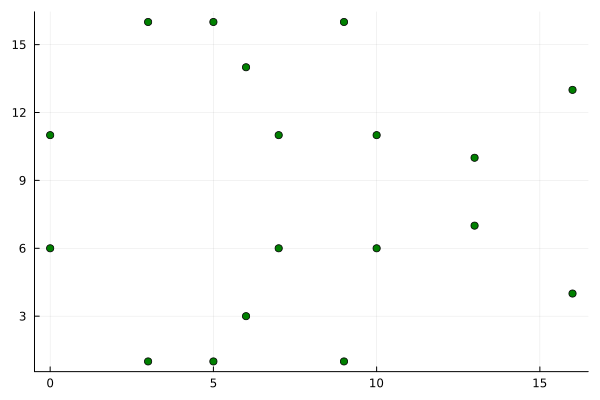

In [278]:
x = []
y = []

for p in lis_gf
   append!(x,p[1])
   append!(y,p[2]) 
end

pop!(x)
pop!(y)

scatter(x,y, legend = false,markercolor = :green) # puntos

In [265]:
print("->")
for i in 1:length(lis_gf)
    print(lis_gf[i])
    print("->")
end

->(5, 1)->(6, 3)->(10, 6)->(3, 1)->(9, 16)->(16, 13)->(0, 6)->(13, 7)->(7, 6)->(7, 11)->(13, 10)->(0, 11)->(16, 4)->(9, 1)->(3, 16)->(10, 11)->(6, 14)->(5, 16)->(-1, -1)->

In [241]:
#=
Mecanismo iterativo para obtener el punto del grupo cíclico para la firma digital
=#

d = 1

for x in 1:41
    print(d)
    print("\n")
    d = d + 1
    if d%20 == 0
        d = 1
    end
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3


# Comprobación del mecanismo de la firma digital

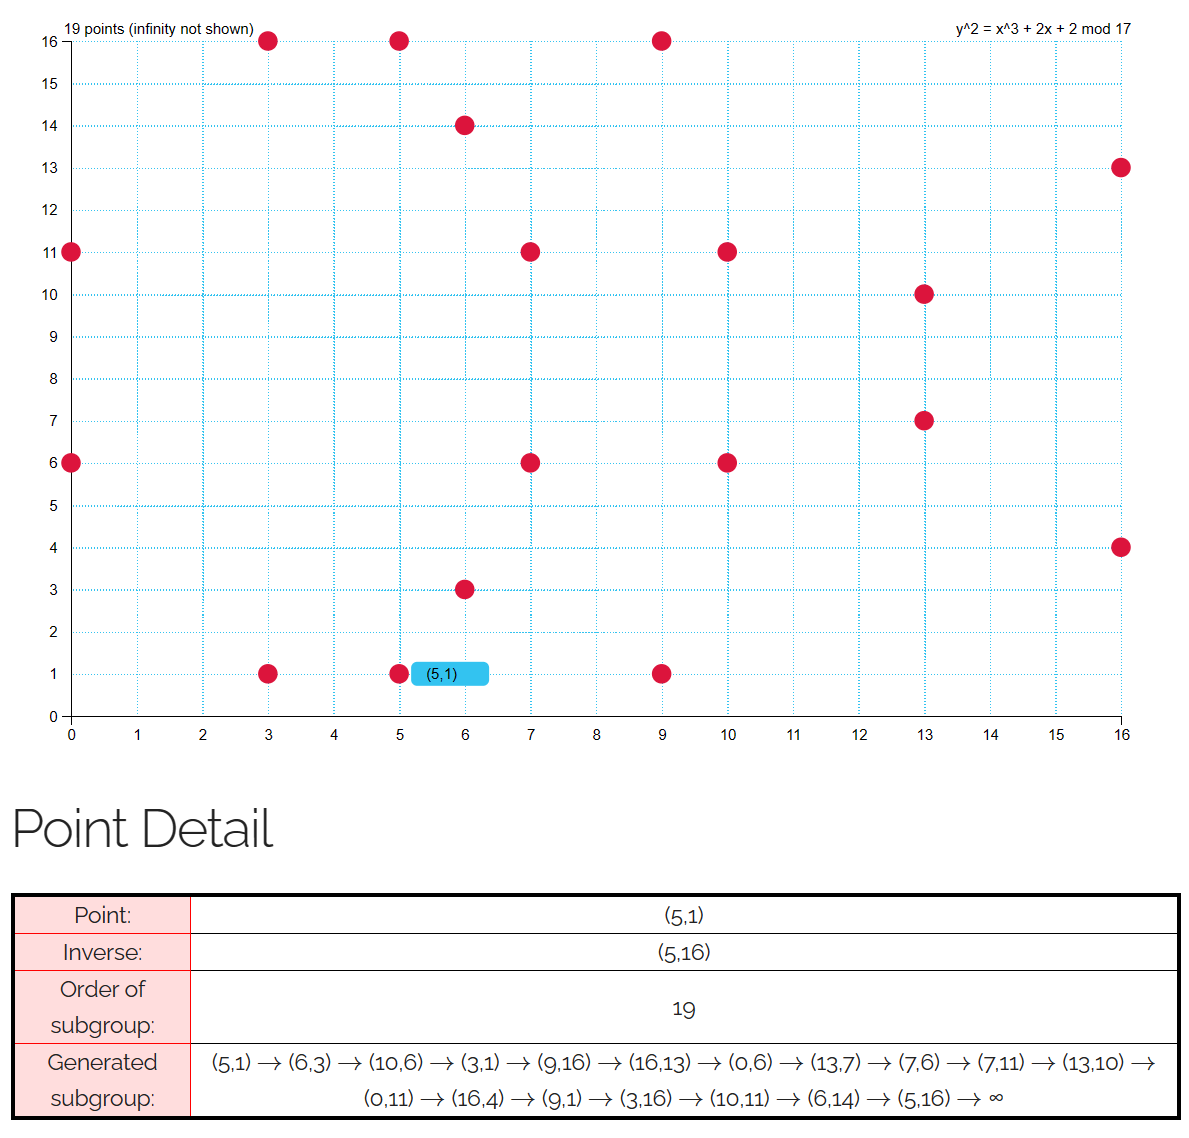